In [9]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import streamlit as st
import pandas as pd
import plotly.express as px
import time
import random

# Importing in the data

In [10]:
file_id = '1cZq76ihih23nmd29UV31RD6WEmOShOys'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'fields.csv'
gdown.download(url, output, quiet=False)

file_id = '1NHPAsf2zrdyI-ydx_oDhqfNvWVastlSI'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'survey.csv'
gdown.download(url, output, quiet=False)

file_id = '1L_I0_tZKMp9r6PMEJulyVvLW-gs8pbCC'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'AmazonPurchases.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1cZq76ihih23nmd29UV31RD6WEmOShOys
To: /content/fields.csv
100%|██████████| 2.53k/2.53k [00:00<00:00, 6.73MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NHPAsf2zrdyI-ydx_oDhqfNvWVastlSI
To: /content/survey.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 14.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1L_I0_tZKMp9r6PMEJulyVvLW-gs8pbCC
From (redirected): https://drive.google.com/uc?id=1L_I0_tZKMp9r6PMEJulyVvLW-gs8pbCC&confirm=t&uuid=bc373422-4e35-4ef3-a514-2ea8431ff248
To: /content/AmazonPurchases.csv
100%|██████████| 351M/351M [00:05<00:00, 61.4MB/s]


'AmazonPurchases.csv'

## Fields Data



In [ ]:
fields = pd.read_csv('fields.csv')
print(fields.head())

          Unnamed: 0                                             fields
0  Survey ResponseID                                        Response ID
1        Q-demos-age                            What is your age group?
2   Q-demos-hispanic    Are you of Spanish, Hispanic, or Latino origin?
3       Q-demos-race  Choose one or more races that you consider you...
4  Q-demos-education  What is the highest level of education you hav...


In [ ]:
fields.info()
fields.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23 non-null     object
 1   fields      23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


KeyError: 'Survey ResponseID'

## Survey Data

In [ ]:
survey = pd.read_csv('survey.csv')
print(survey.head())

   Survey ResponseID    Q-demos-age Q-demos-hispanic  \
0  R_1ou69fj4DQGsVcp  35 - 44 years               No   
1  R_2UbJL30HRjK1sdD  45 - 54 years               No   
2  R_UPXamGKtmf4RVIZ  25 - 34 years               No   
3  R_2dYk5auG9Fv5Qve  35 - 44 years              Yes   
4  R_2aP0GyIR66gSTiR  25 - 34 years               No   

                Q-demos-race  \
0  Black or African American   
1         White or Caucasian   
2         White or Caucasian   
3         White or Caucasian   
4         White or Caucasian   

                                   Q-demos-education       Q-demos-income  \
0                         High school diploma or GED    $25,000 - $49,999   
1                         High school diploma or GED  $100,000 - $149,999   
2                         High school diploma or GED    $25,000 - $49,999   
3  Graduate or professional degree (MA, MS, MBA, ...    $50,000 - $74,999   
4                         High school diploma or GED    $50,000 - $74,999   

  Q-dem

In [ ]:
survey.info()
survey.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Survey ResponseID           5027 non-null   object
 1   Q-demos-age                 5027 non-null   object
 2   Q-demos-hispanic            5027 non-null   object
 3   Q-demos-race                5027 non-null   object
 4   Q-demos-education           5027 non-null   object
 5   Q-demos-income              5027 non-null   object
 6   Q-demos-gender              5027 non-null   object
 7   Q-sexual-orientation        5027 non-null   object
 8   Q-demos-state               5027 non-null   object
 9   Q-amazon-use-howmany        5027 non-null   object
 10  Q-amazon-use-hh-size        5027 non-null   object
 11  Q-amazon-use-how-oft        5027 non-null   object
 12  Q-substance-use-cigarettes  5027 non-null   object
 13  Q-substance-use-marijuana   5027 non-null   obje

,0
Survey ResponseID,0
Q-small-biz-use,0
Q-sell-consumer-data,0
Q-sell-YOUR-data,0
Q-personal-wheelchair,0
Q-personal-diabetes,0
Q-substance-use-alcohol,0
Q-substance-use-marijuana,0
Q-substance-use-cigarettes,0
Q-census-use,0


# Purchase Data (Main Data)

In [ ]:
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
print(purchases.head(10))

   Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0  2018-12-04                     7.98         1                     NJ   
1  2018-12-22                    13.99         1                     NJ   
2  2018-12-24                     8.99         1                     NJ   
3  2018-12-25                    10.45         1                     NJ   
4  2018-12-25                    10.00         1                     NJ   
5  2019-02-18                    10.99         1                     NJ   
6  2019-02-18                     4.99         1                     NJ   
7  2019-03-15                   124.99         1                     NJ   
8  2019-04-23                    12.99         1                     NJ   
9  2019-04-23                    24.69         1                     NJ   

                                               Title ASIN/ISBN (Product Code)  \
0  SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...               B0143RTB1E   
1  Betron BS

In [ ]:
purchases.info()
purchases.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850717 entries, 0 to 1850716
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Order Date                object 
 1   Purchase Price Per Unit   float64
 2   Quantity                  int64  
 3   Shipping Address State    object 
 4   Title                     object 
 5   ASIN/ISBN (Product Code)  object 
 6   Survey ResponseID         object 
 7   Category                  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 113.0+ MB


,0
Order Date,0
Purchase Price Per Unit,0
Quantity,0
Survey ResponseID,0
ASIN/ISBN (Product Code),973
Shipping Address State,87812
Category,89658
Title,89740


In [ ]:
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases['year'] = purchases['Order Date'].dt.year
purchases['month'] = purchases['Order Date'].dt.month
purchases['day'] = purchases['Order Date'].dt.day
#purchases = purchases[purchases['Order Date'] < '2022-12-31']

In [ ]:
same_order_price = purchases.groupby(['Survey ResponseID', 'Order Date'])['Purchase Price Per Unit'].sum()
same_order_qty = purchases.groupby(['Survey ResponseID', 'Order Date'])['Quantity'].sum()


df = pd.merge(purchases, same_order_price, on=['Survey ResponseID', 'Order Date'], how='left')
df = pd.merge(df, same_order_qty, on=['Survey ResponseID', 'Order Date'], how='left')

#df.rename(columns={'Purchase Price Per Unit_y': 'Total Purchase Amt', 'Quantity_y': 'Total Purchase Qty', 'day_y': 'no_purchases_in_same_month'}, inplace=True)
#df.drop(columns=['Purchase Price Per Unit_x', 'Quantity_x', 'Title', 'ASIN/ISBN (Product Code)', 'year', 'month', 'day_x', 'Category'], inplace=True)

df.rename(columns={'Purchase Price Per Unit_y': 'Total Purchase Amt', 'Quantity_y': 'Total Purchase Qty'}, inplace=True)
df.drop(columns=['Purchase Price Per Unit_x', 'Quantity_x', 'Title', 'ASIN/ISBN (Product Code)', 'Category'], inplace=True)

# df = df.drop_duplicates()
df.head(10)



,Order Date,Shipping Address State,Survey ResponseID,year,month,day,Total Purchase Amt,Total Purchase Qty
0,2018-12-04,NJ,R_01vNIayewjIIKMF,2018,12,4,7.98,1
1,2018-12-22,NJ,R_01vNIayewjIIKMF,2018,12,22,13.99,1
2,2018-12-24,NJ,R_01vNIayewjIIKMF,2018,12,24,8.99,1
3,2018-12-25,NJ,R_01vNIayewjIIKMF,2018,12,25,20.45,2
4,2018-12-25,NJ,R_01vNIayewjIIKMF,2018,12,25,20.45,2
5,2019-02-18,NJ,R_01vNIayewjIIKMF,2019,2,18,15.98,2
6,2019-02-18,NJ,R_01vNIayewjIIKMF,2019,2,18,15.98,2
7,2019-03-15,NJ,R_01vNIayewjIIKMF,2019,3,15,124.99,1
8,2019-04-23,NJ,R_01vNIayewjIIKMF,2019,4,23,37.68,2
9,2019-04-23,NJ,R_01vNIayewjIIKMF,2019,4,23,37.68,2


In [ ]:
same_order_month = purchases.groupby(['Survey ResponseID', 'year', 'month'])['day'].count()
df = pd.merge(df, same_order_month, on=['Survey ResponseID', 'year', 'month'], how='left')

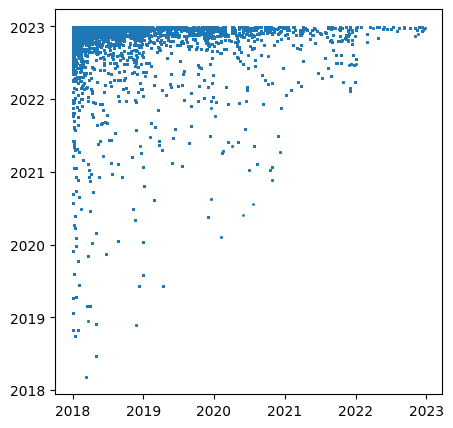

In [ ]:
#churn analysis
#Graph for first order date vs last order date
purchases['min_date'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("min")
purchases['max_date'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
plt.figure(figsize=(5,5))
plt.scatter(purchases['min_date'],purchases['max_date'], s = 1)

In [ ]:
#Rate of new customers vs rate of lost customers
#Churn

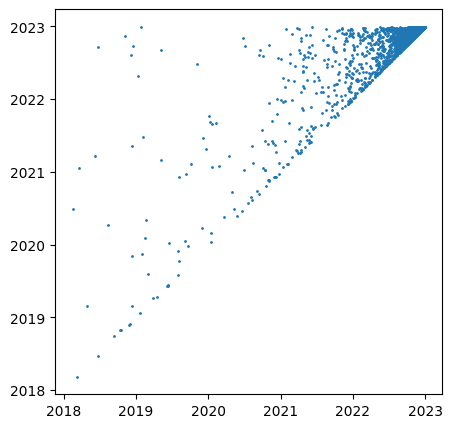

In [ ]:
#Graph for second last order date vs last order date
purchases['max_date'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
purchases = purchases.sort_values(by = 'Order Date', ascending = False)
temp = purchases.groupby(['Survey ResponseID']).nth(2)[['Order Date','max_date']]


plt.figure(figsize=(5,5))
plt.scatter(temp['Order Date'],temp['max_date'], s = 1)

count                             5015
mean     2022-12-05 00:47:05.443668992
min                2018-06-23 00:00:00
25%                2022-11-17 00:00:00
50%                2022-12-21 00:00:00
75%                2023-02-28 00:00:00
max                2023-09-01 00:00:00
Name: max_date, dtype: object
count                             5015
mean     2022-09-10 12:28:51.445662976
min                2018-03-09 00:00:00
25%                2022-09-30 00:00:00
50%                2022-10-23 00:00:00
75%                2022-10-29 00:00:00
max                2022-11-01 00:00:00
Name: max_date_adjusted, dtype: object
    churn_adjusted  churn_real
0         0.367498    0.093719
1         0.191027    0.068594
2         0.121037    0.053639
3         0.086740    0.044068
4         0.065603    0.035892
5         0.051844    0.029511
6         0.043669    0.026520
7         0.037488    0.023729
8         0.033300    0.021735
9         0.030907    0.020339
10        0.027717    0.017946
11        0.0

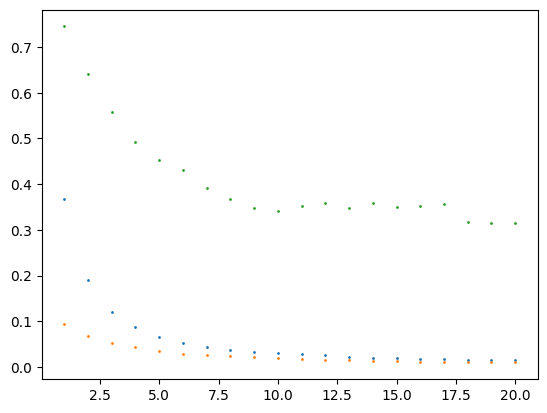

In [ ]:
#comparing churn rate error for different AOI
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases['max_date'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
purchases['min_date'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("min")
purchases = purchases[purchases['Order Date'] <= pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['orders'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['max_date_adjusted'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
#purchases = purchases.assign(max_date_adjusted = purchases['max_date'].where(purchases['max_date'] <= pd.to_datetime('2022-11-01', format='%Y-%m-%d'),pd.to_datetime('2022-11-01', format='%Y-%m-%d')))
df = purchases[['Survey ResponseID','max_date','max_date_adjusted','min_date','orders']].drop_duplicates()
print(df['max_date'].describe())
print(df['max_date_adjusted'].describe())
churn_data = []

for i in range(1,21):
  df['order_freq'] = (df['max_date_adjusted'] - df['min_date'])/df['orders']
  df['churned_adjusted'] = np.where(df['order_freq']*i < pd.to_datetime('2022-11-01', format='%Y-%m-%d') - df['max_date_adjusted'], 1, 0)
  df['churned_real'] = np.where(df['order_freq']*i < pd.to_datetime('2022-11-01', format='%Y-%m-%d') - df['max_date'], 1, 0)
  churn_adjusted = sum(df['churned_adjusted'])/len(df)
  churn_real = sum(df['churned_real'])/len(df)
  churn_data.append([churn_adjusted, churn_real])
df_graph = pd.DataFrame(churn_data, columns=['churn_adjusted', 'churn_real'])
print(df_graph)
plt.scatter([i for i in range(1,21)],df_graph['churn_adjusted'], s = 1)
plt.scatter([i for i in range(1,21)],df_graph['churn_real'], s = 1)
plt.scatter([i for i in range(1,21)],(df_graph['churn_adjusted'] - df_graph['churn_real'])/df_graph['churn_adjusted'], s = 1 )


In [ ]:
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases['max_date'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
purchases['min_date'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("min")
purchases = purchases[purchases['Order Date'] <= pd.to_datetime('2021-11-01', format='%Y-%m-%d')]
purchases['orders'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['max_date_adjusted'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
df = purchases[['Survey ResponseID','max_date','max_date_adjusted','min_date','orders']].drop_duplicates()
print(df['max_date'].describe())
print(df['max_date_adjusted'].describe())
churn_data = []

for i in range(1,21):
  df['order_freq'] = (df['max_date_adjusted'] - df['min_date'])/df['orders']
  df['churned_adjusted'] = np.where(df['order_freq']*i < pd.to_datetime('2021-11-01', format='%Y-%m-%d') - df['max_date_adjusted'], 1, 0)
  df['churned_real'] = np.where(df['order_freq']*i < pd.to_datetime('2021-11-01', format='%Y-%m-%d') - df['max_date'], 1, 0)
  churn_adjusted = sum(df['churned_adjusted'])/len(df)
  churn_real = sum(df['churned_real'])/len(df)
  churn_data.append([churn_adjusted, churn_real])
df_graph = pd.DataFrame(churn_data, columns=['churn_adjusted', 'churn_real'])
print(df_graph)
plt.scatter([i for i in range(1,21)],df_graph['churn_adjusted'], s = 1)
plt.scatter([i for i in range(1,21)],df_graph['churn_real'], s = 1)
plt.scatter([i for i in range(1,21)],(df_graph['churn_adjusted'] - df_graph['churn_real'])/df_graph['churn_adjusted'], s = 1 )


In [ ]:
#RFM analysis
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases = purchases[purchases['Order Date'] < pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
purchases['Recency'] = pd.to_datetime('2022-11-01', format='%Y-%m-%d') - purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
date2021 = pd.to_datetime('2022-01-01', format='%Y-%m-%d')
purchases['Month'] = (purchases['Month']+1)//2

purchases['Frequency'] = purchases.groupby(['Survey ResponseID','Year','Month'])['Order Date'].transform('nunique')
purchases['Order value'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']
purchases['Monetary'] = purchases.groupby(['Survey ResponseID','Year','Month'])['Order value'].transform('sum')

#purchases['Frequency'] = purchases.groupby(['Survey ResponseID'])['Frequency'].transform('sum')
dec_2021_mask = (purchases['Year'] == 2022) & (purchases['Month'] == 5)

customers_with_dec_transactions = purchases.loc[dec_2021_mask, 'Survey ResponseID'].unique()
print(customers_with_dec_transactions)
customers_without_dec_transactions_mask = ~purchases['Survey ResponseID'].isin(customers_with_dec_transactions)
purchases.loc[customers_without_dec_transactions_mask, ['Year','Month','Frequency', 'Monetary']] = [2022,5,0,0]
purchases['Recency'] = pd.to_datetime('2022-11-01', format='%Y-%m-%d') - purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")

purchases = purchases[(purchases['Year'] >= 2022) & (purchases['Month'] == 5)]
purchases = purchases[['Recency','Frequency','Monetary','Survey ResponseID']]
purchases = purchases.drop_duplicates()
purchases['Frequency'] = purchases.groupby(['Survey ResponseID'])['Frequency'].transform('sum')
purchases['Monetary'] = purchases.groupby(['Survey ResponseID'])['Monetary'].transform('sum')
purchases = purchases.drop_duplicates()

#purchases = purchases[['Recency','Frequency','Monetary','Survey ResponseID']]
#purchases = purchases.drop_duplicates()
purchases['Recency'] = purchases['Recency'].dt.days
#purchases['Recency'] = np.log(purchases['Recency'])
print(purchases['Recency'].describe())
print(purchases['Frequency'].describe())
print(purchases['Monetary'].describe())
fig = px.scatter_3d(purchases, x='Recency', y='Frequency', z='Monetary',
                    color='Monetary',
                    labels={'Recency':'log(Recency)', 'Frequency':'Frequency', 'Monetary':'Monetary'},
                    title="RFM 3D Scatter Plot")
fig.show()


['R_037XK72IZBJyF69' 'R_06RZP9pS7kONINr' 'R_06d9ULxrBmkwSTn' ...
 'R_zdQYFhfeqyBd2dH' 'R_zfnsck2ZatnGtY5' 'R_zfqnsBzlOAKibzb']


<ipython-input-10-a6d993fe896b>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-a6d993fe896b>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    5015.000000
mean       52.429312
std       141.018991
min         1.000000
25%         4.000000
50%        10.000000
75%        33.000000
max      1698.000000
Name: Recency, dtype: float64
count    5015.000000
mean        6.516849
std         7.197514
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        51.000000
Name: Frequency, dtype: float64
count    5015.000000
mean      347.746748
std       524.815743
min         0.000000
25%        37.545000
50%       166.270000
75%       452.425000
max      9359.190000
Name: Monetary, dtype: float64


In [ ]:

fig = px.scatter(purchases,
                 x='Frequency',
                 y='Monetary',
                 size='Recency',
                 color='Recency',  # Optional: Color points by recency
                 labels={'Frequency':'Frequency', 'Monetary':'Monetary', 'Recency':'Recency'},
                 title="Frequency vs. Monetary with Recency as Size")
fig.show()

In [ ]:
#Recency boxplot
purchases_plot = purchases.copy()
purchases_plot = purchases_plot[purchases_plot['Recency']<= 180]
fig = px.box(purchases_plot, y="Recency", title="Boxplot of Recency")
fig.show()

#purchases['Recency'] = purchases['Recency'].dt.days
print(sum(purchases['Recency'] <= 30)/len(purchases))
print(sum((purchases['Recency'] <= 60) & (purchases['Recency'] > 30))/len(purchases))
print(sum(purchases['Recency'] > 60)/len(purchases))

0.7373878364905284
0.09491525423728814
0.16769690927218345


count    5015.000000
mean      186.666572
std       322.715816
min         0.000000
25%         0.000000
50%        77.630000
75%       237.460000
max      6223.150000
Name: Monetary, dtype: float64


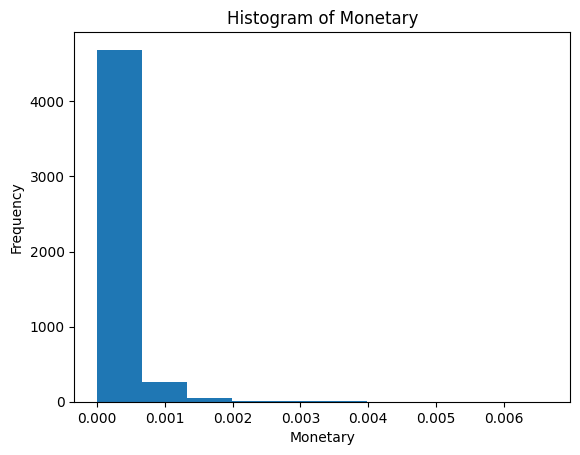

In [ ]:
#Histogram of monetary
print(purchases['Monetary'].describe())
plt.hist(purchases['Monetary']/sum(purchases['Monetary']))
#plt.hist(purchases[purchases['Monetary']<1500]['Monetary'])
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Histogram of Monetary')
plt.show()

count    5015.000000
mean        3.362114
std         3.896405
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        27.000000
Name: Frequency, dtype: float64


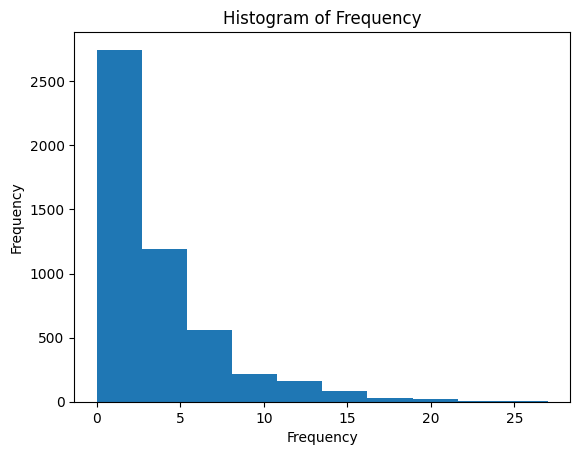

In [ ]:
#Histogram of frequency
print(purchases['Frequency'].describe())
plt.hist(purchases['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency')
plt.show()

RFM
333    1018
332     401
331      24
323     184
322     522
321     218
313      39
312     287
311    1035
233       3
223       2
222       8
221       4
213       8
212      35
211     399
111     828
Name: count, dtype: int64


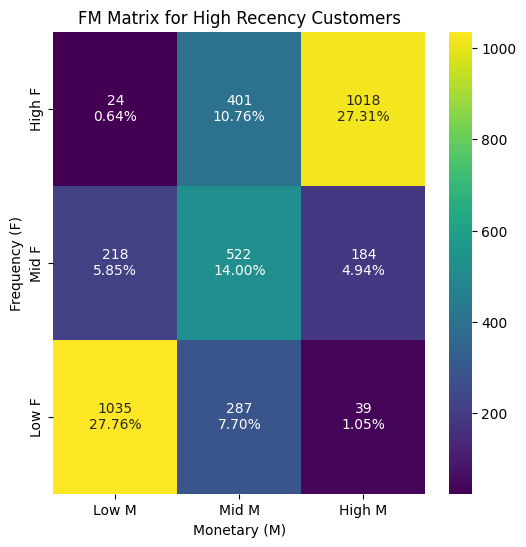

In [ ]:
#Converting current rfm to low,medium,high RFM
freq_medium = purchases['Frequency'].quantile(0.5)
freq_high = purchases['Frequency'].quantile(0.75)
monetary_medium = purchases['Monetary'].quantile(0.5)
monetary_high = purchases['Monetary'].quantile(0.75)
conditions_recency = [
    purchases['Recency'] <= 31,
    (purchases['Recency'] > 31) & (purchases['Recency'] <= 61),
    purchases['Recency'] > 61
]

conditions_frequency = [
    purchases['Frequency'] <= freq_medium,
    (purchases['Frequency'] > freq_medium) & (purchases['Frequency'] < freq_high),
    purchases['Frequency'] >= freq_high
]

conditions_monetary = [
    purchases['Monetary'] <= monetary_medium,
    (purchases['Monetary'] > monetary_medium) & (purchases['Monetary'] < monetary_high),
    purchases['Monetary'] >= monetary_high
]
choices_R = [3,2,1]
choices_FM = [1,2,3]
purchases['Recency_category'] = np.select(conditions_recency, choices_R, default= 'Unknown')
purchases['Frequency_category'] = np.select(conditions_frequency, choices_FM, default= 'Unknown')
purchases['Monetary_category'] = np.select(conditions_monetary, choices_FM, default= 'Unknown')
purchases['RFM'] = purchases['Recency_category'].astype(str) + purchases['Frequency_category'].astype(str) + purchases['Monetary_category'].astype(str)
print(purchases['RFM'].value_counts().sort_index(ascending= False))
current_rfm = purchases[['Survey ResponseID','RFM']].drop_duplicates()
recency_3_data = purchases[purchases['Recency'] == 3]
fm_counts = [
    [sum(purchases['RFM'] == "331"), sum(purchases['RFM'] == "332"), sum(purchases['RFM'] == "333")],
    [sum(purchases['RFM'] == "321"), sum(purchases['RFM'] == "322"), sum(purchases['RFM'] == "323")],
    [sum(purchases['RFM'] == "311"), sum(purchases['RFM'] == "312"), sum(purchases['RFM'] == "313")]
]
fm_matrix = np.array(fm_counts)
total_count = fm_matrix.sum()
percentages = (fm_matrix / total_count * 100).round(2)
annot_labels = np.array([f"{count}\n{percent:.2f}%"
                         for count_row, percent_row in zip(fm_matrix, percentages)
                         for count, percent in zip(count_row, percent_row)]).reshape(fm_matrix.shape)

plt.figure(figsize=(6, 6))
sns.heatmap(fm_matrix, annot=annot_labels, fmt="", cmap="viridis",
            xticklabels=['Low M', 'Mid M', 'High M'],
            yticklabels=['High F', 'Mid F', 'Low F'])
plt.title("FM Matrix for High Recency Customers")
plt.xlabel("Monetary (M)")
plt.ylabel("Frequency (F)")
plt.show()

In [ ]:
#Lifetime RFM
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases = purchases[purchases['Order Date'] < pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
purchases['Recency'] = pd.to_datetime('2022-11-01', format='%Y-%m-%d') - purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
purchases['Frequency'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['Order value'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']
purchases['Monetary'] = purchases.groupby(['Survey ResponseID'])['Order value'].transform('sum')
purchases = purchases[['Recency','Frequency','Monetary','Survey ResponseID']]
purchases = purchases.drop_duplicates()

#purchases = purchases[['Recency','Frequency','Monetary','Survey ResponseID']]
#purchases = purchases.drop_duplicates()
purchases['Recency'] = purchases['Recency'].dt.days
#purchases['Recency'] = np.log(purchases['Recency'])

print(purchases['Recency'].describe())
print(purchases['Frequency'].describe())
print(purchases['Monetary'].describe())

count    5015.000000
mean       52.429312
std       141.018991
min         1.000000
25%         4.000000
50%        10.000000
75%        33.000000
max      1698.000000
Name: Recency, dtype: float64
count    5015.000000
mean      154.819741
std       154.947900
min         1.000000
25%        43.500000
50%       108.000000
75%       214.000000
max      1184.000000
Name: Frequency, dtype: float64
count      5015.000000
mean       8227.109438
std        9241.117612
min           4.990000
25%        2078.355000
50%        5373.420000
75%       10997.050000
max      107490.920000
Name: Monetary, dtype: float64


<ipython-input-7-97d60b8e3bd6>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RFM
333     988
332     227
331      12
323     214
322     653
321     232
313      13
312     207
311    1182
233      19
232       3
223       9
222      54
221      21
212      44
211     309
133       6
132       2
131       1
123       4
122      37
121      12
113       1
112      26
111     739
Name: count, dtype: int64


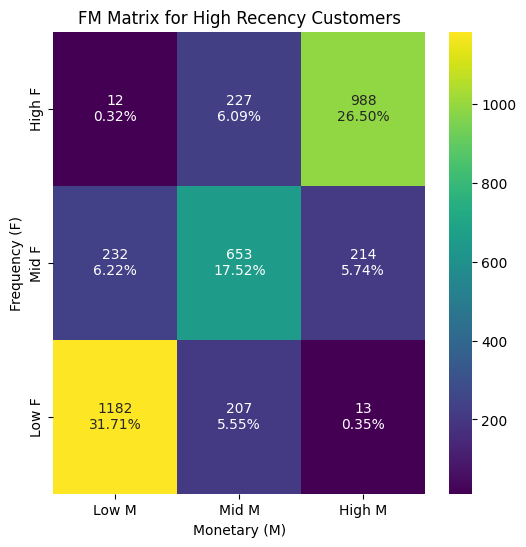

In [ ]:
#Converting lifetime rfm to low,medium,high RFM
freq_medium = purchases['Frequency'].quantile(0.5)
freq_high = purchases['Frequency'].quantile(0.75)
monetary_medium = purchases['Monetary'].quantile(0.5)
monetary_high = purchases['Monetary'].quantile(0.75)
conditions_recency = [
    purchases['Recency'] <= 31,
    (purchases['Recency'] > 31) & (purchases['Recency'] <= 61),
    purchases['Recency'] > 61
]

conditions_frequency = [
    purchases['Frequency'] <= freq_medium,
    (purchases['Frequency'] > freq_medium) & (purchases['Frequency'] < freq_high),
    purchases['Frequency'] >= freq_high
]

conditions_monetary = [
    purchases['Monetary'] <= monetary_medium,
    (purchases['Monetary'] > monetary_medium) & (purchases['Monetary'] < monetary_high),
    purchases['Monetary'] >= monetary_high
]
choices_R = [3,2,1]
choices_FM = [1,2,3]
purchases['Recency_category'] = np.select(conditions_recency, choices_R, default= 'Unknown')
purchases['Frequency_category'] = np.select(conditions_frequency, choices_FM, default= 'Unknown')
purchases['Monetary_category'] = np.select(conditions_monetary, choices_FM, default= 'Unknown')
purchases['RFM'] = purchases['Recency_category'].astype(str) + purchases['Frequency_category'].astype(str) + purchases['Monetary_category'].astype(str)
print(purchases['RFM'].value_counts().sort_index(ascending= False))
lifetime_rfm = purchases[['Survey ResponseID','RFM']].drop_duplicates()
recency_3_data = purchases[purchases['Recency'] == 3]
fm_counts = [
    [sum(purchases['RFM'] == "331"), sum(purchases['RFM'] == "332"), sum(purchases['RFM'] == "333")],
    [sum(purchases['RFM'] == "321"), sum(purchases['RFM'] == "322"), sum(purchases['RFM'] == "323")],
    [sum(purchases['RFM'] == "311"), sum(purchases['RFM'] == "312"), sum(purchases['RFM'] == "313")]
]
fm_matrix = np.array(fm_counts)
total_count = fm_matrix.sum()
percentages = (fm_matrix / total_count * 100).round(2)
annot_labels = np.array([f"{count}\n{percent:.2f}%"
                         for count_row, percent_row in zip(fm_matrix, percentages)
                         for count, percent in zip(count_row, percent_row)]).reshape(fm_matrix.shape)

plt.figure(figsize=(6, 6))
sns.heatmap(fm_matrix, annot=annot_labels, fmt="", cmap="viridis",
            xticklabels=['Low M', 'Mid M', 'High M'],
            yticklabels=['High F', 'Mid F', 'Low F'])
plt.title("FM Matrix for High Recency Customers")
plt.xlabel("Monetary (M)")
plt.ylabel("Frequency (F)")
plt.show()

In [ ]:
#Comparing current rfm to lifetime rfm
rfm_df = current_rfm.merge(lifetime_rfm, on='Survey ResponseID', how='inner', suffixes=('_current', '_lifetime'))
rfm_atrisk = rfm_df[(rfm_df['RFM_current'] != rfm_df['RFM_lifetime']) & (rfm_df['RFM_lifetime'] == "233")]
rfm_atrisk = rfm_atrisk[rfm_atrisk['RFM_current'].astype(int) < 300]
print(rfm_atrisk)

      Survey ResponseID RFM_current RFM_lifetime
54    R_10AtO7bUfe8iWYK         212          233
77    R_10qrHohvVyRhmA4         223          233
277   R_1FzILFUkhEqt8k1         222          233
828   R_1jARg5bGH5uqAKW         211          233
1063  R_1qXa6rLKlwTkwDN         222          233
1547  R_2ClZTreQFwcrcpb         211          233
1808  R_2UbJL30HRjK1sdD         211          233
2502  R_2yjckpDXWcsiLPz         213          233
2655  R_32WvdLjYpicai6o         211          233
2936  R_3JJfhp7Z7vUO8K2         222          233
3453  R_3kp1cu1nmAKu6mC         211          233
3896  R_8piDwWBq7V7tyZb         211          233
4124  R_OwFousWyWRNjaoN         211          233
4759  R_sYZmFJSmzmxm3JL         212          233
4811  R_tXTuhZjAGOOBYul         211          233
4951  R_xx5M0tAgJVFpvl7         211          233


<ipython-input-19-bc188201bf72>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-bc188201bf72>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-bc188201bf72>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-bc18

count                           4991
mean      46 days 04:56:35.872570627
std      133 days 06:28:44.017327430
min                  1 days 00:00:00
25%                  3 days 00:00:00
50%                 10 days 00:00:00
75%                 25 days 00:00:00
max               1461 days 00:00:00
Name: Recency, dtype: object
count    4991.000000
mean        3.933881
std         4.242787
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        27.000000
Name: Frequency, dtype: float64
count    4991.000000
mean      228.598487
std       347.440309
min         0.000000
25%        18.925000
50%       115.140000
75%       300.960000
max      7597.830000
Name: Monetary, dtype: float64


<ipython-input-19-bc188201bf72>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-bc188201bf72>:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-bc188201bf72>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-bc18

10 days 00:00:00
3.0
115.13999999999999
     Recency  Frequency  Monetary
1   0.515728   0.784412  0.500100
2   0.499000   0.742697  0.389956
3   0.490596   0.711885  0.352141
4   0.494101   0.725655  0.385523
5   0.492206   0.722222  0.385691
6   0.490114   0.734172  0.399840
7   0.499201   0.724042  0.395367
8   0.491218   0.737725  0.441118
9   0.503591   0.736233  0.407023
10  0.493020   0.729158  0.376147
11  0.505484   0.742572  0.415354


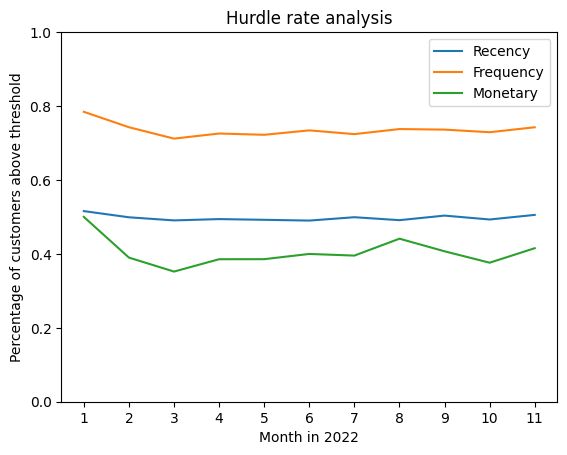

In [ ]:
#Hurdle rate analysis
#Recency: Days since last order
#Frequency: Number of orders within last month
#Monetary: Total spending within last month
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases = purchases[purchases['Order Date'] < pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
date2021 = pd.to_datetime('2022-01-01', format='%Y-%m-%d')
purchases2021 = purchases[purchases['Order Date'] < date2021]
purchases2021['Recency'] = pd.to_datetime('2022-01-01', format='%Y-%m-%d') - purchases2021.groupby(['Survey ResponseID'])['Order Date'].transform("max")
purchases2021['Frequency'] = purchases2021.groupby(['Survey ResponseID','Year','Month'])['Order Date'].transform('nunique')

purchases2021['Order value'] = purchases2021['Quantity'] * purchases2021['Purchase Price Per Unit']
purchases2021['Monetary'] = purchases2021.groupby(['Survey ResponseID','Year','Month'])['Order value'].transform('sum')
dec_2021_mask = (purchases2021['Year'] == 2021) & (purchases2021['Month'] == 12)
customers_with_dec_transactions = purchases2021.loc[dec_2021_mask, 'Survey ResponseID'].unique()
customers_without_dec_transactions_mask = ~purchases2021['Survey ResponseID'].isin(customers_with_dec_transactions)
purchases2021.loc[customers_without_dec_transactions_mask, ['Year','Month','Frequency', 'Monetary']] = [2021,12,0,0]
purchases2021 = purchases2021[(purchases2021['Year'] >= 2021) & (purchases2021['Month'] >= 12)]

purchases2021 = purchases2021[['Recency','Frequency','Monetary','Survey ResponseID']]
purchases2021 = purchases2021.drop_duplicates()

print(purchases2021['Recency'].describe())
print(purchases2021['Frequency'].describe())
print(purchases2021['Monetary'].describe())

Recency_threshold = purchases2021['Recency'].quantile(0.5)
Frequency_threshold = purchases2021['Frequency'].quantile(0.5)
Monetary_threshold = purchases2021['Monetary'].quantile(0.5)
n_customers = purchases2021['Survey ResponseID'].nunique()

pct_each_month = {'Recency': [], 'Frequency': [], 'Monetary': []}

pct_each_month = pd.DataFrame(data=pct_each_month)
for i in range(1,12):
  temp_date = pd.to_datetime('2022-' + str(i) + '-01', format='%Y-%m-%d')
  purchases2021_temp = purchases[purchases['Order Date'] < temp_date]
  purchases2021_temp['Recency'] = temp_date - purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform("max")
  #purchases2021_temp['Frequency'] = (purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform("max") - purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform("min"))/purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
  purchases2021_temp['Frequency'] = purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
  purchases2021_temp['Order value'] = purchases2021_temp['Quantity'] * purchases2021_temp['Purchase Price Per Unit']
  purchases2021_temp['Monetary'] = purchases2021_temp.groupby(['Survey ResponseID','Year','Month'])['Order value'].transform('sum')
  dec_2021_mask = (purchases2021_temp['Year'] == (2021 if i == 1 else 2022)) & (purchases2021_temp['Month'] == (12 if i == 1 else i-1))
  customers_with_dec_transactions = purchases2021_temp.loc[dec_2021_mask, 'Survey ResponseID'].unique()
  customers_without_dec_transactions_mask = ~purchases2021_temp['Survey ResponseID'].isin(customers_with_dec_transactions)
  purchases2021_temp.loc[customers_without_dec_transactions_mask, ['Year','Month','Frequency', 'Monetary']] = [2021 if i == 1 else 2022,12 if i == 1 else i - 1,0,0]
  purchases2021_temp = purchases2021_temp[(purchases2021_temp['Year'] >= (2021 if i == 1 else 2022)) & (purchases2021_temp['Month'] >= (12 if i == 1 else i - 1))]

  #purchases2021_temp['Monetary'] = purchases2021_temp.groupby(['Survey ResponseID'])['Order value'].transform('sum')
  purchases2021_temp = purchases2021_temp[['Recency','Frequency','Monetary','Survey ResponseID']]
  purchases2021_temp = purchases2021_temp.drop_duplicates()
  n_customers = purchases2021_temp['Survey ResponseID'].nunique()
  pct_each_month.loc[i] = [sum(purchases2021_temp['Recency'] <= Recency_threshold)/n_customers,
                           sum(purchases2021_temp['Frequency'] >= Frequency_threshold)/n_customers,
                           sum(purchases2021_temp['Monetary'] >= Monetary_threshold)/n_customers]

print(Recency_threshold)
print(Frequency_threshold)
print(Monetary_threshold)
print(pct_each_month)
plt.plot(pct_each_month['Recency'], label = 'Recency')
plt.plot(pct_each_month['Frequency'], label = 'Frequency')
plt.plot(pct_each_month['Monetary'], label = 'Monetary')
plt.ylim(0,1)
plt.xticks(range(1,12))
plt.xlabel("Month in 2022")
plt.ylabel("Percentage of customers above threshold")
plt.title("Hurdle rate analysis")
plt.legend()


In [ ]:
#Hurdle rate analysis
#Recency: Days since last order
#Frequency: Number of orders within last month
#Monetary: Total spending within last month
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases = purchases[purchases['Order Date'] < pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
date2021 = pd.to_datetime('2020-01-01', format='%Y-%m-%d')
purchases2021 = purchases[purchases['Order Date'] < date2021]
purchases2021['Recency'] = pd.to_datetime('2020-01-01', format='%Y-%m-%d') - purchases2021.groupby(['Survey ResponseID'])['Order Date'].transform("max")
purchases2021['Frequency'] = purchases2021.groupby(['Survey ResponseID'])['Order Date'].transform(lambda x: sum((x < date2021) & (x >= date2021 - pd.Timedelta(days=30))))

purchases2021['Order value'] = purchases2021['Quantity'] * purchases2021['Purchase Price Per Unit']
purchases2021['Monetary'] = purchases2021.groupby(['Survey ResponseID','Year','Month'])['Order value'].transform('sum')
dec_2021_mask = (purchases2021['Year'] == 2019) & (purchases2021['Month'] == 12)
customers_with_dec_transactions = purchases2021.loc[dec_2021_mask, 'Survey ResponseID'].unique()
customers_without_dec_transactions_mask = ~purchases2021['Survey ResponseID'].isin(customers_with_dec_transactions)
purchases2021.loc[customers_without_dec_transactions_mask, ['Year','Month','Frequency', 'Monetary']] = [2019,12,0,0]
purchases2021 = purchases2021[(purchases2021['Year'] >= 2019) & (purchases2021['Month'] >= 12)]

purchases2021 = purchases2021[['Recency','Frequency','Monetary','Survey ResponseID']]
purchases2021 = purchases2021.drop_duplicates()

print(purchases2021['Recency'].describe())
print(purchases2021['Frequency'].describe())
print(purchases2021['Monetary'].describe())

Recency_threshold = purchases2021['Recency'].quantile(0.5)
Frequency_threshold = purchases2021['Frequency'].quantile(0.5)
Monetary_threshold = purchases2021['Monetary'].quantile(0.5)
n_customers = purchases2021['Survey ResponseID'].nunique()

pct_each_month = {'Recency': [], 'Frequency': [], 'Monetary': []}

pct_each_month = pd.DataFrame(data=pct_each_month)
for i in range(1,12):
  temp_date = pd.to_datetime('2020-' + str(i) + '-01', format='%Y-%m-%d')
  purchases2021_temp = purchases[purchases['Order Date'] < temp_date]
  purchases2021_temp['Recency'] = temp_date - purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform("max")
  #purchases2021_temp['Frequency'] = (purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform("max") - purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform("min"))/purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
  purchases2021_temp['Frequency'] = purchases2021_temp.groupby(['Survey ResponseID'])['Order Date'].transform(lambda x: sum((x < temp_date) & (x >= temp_date - pd.Timedelta(days=30))))
  purchases2021_temp['Order value'] = purchases2021_temp['Quantity'] * purchases2021_temp['Purchase Price Per Unit']
  purchases2021_temp['Monetary'] = purchases2021_temp.groupby(['Survey ResponseID','Year','Month'])['Order value'].transform('sum')
  dec_2021_mask = (purchases2021_temp['Year'] == (2019 if i == 1 else 2020)) & (purchases2021_temp['Month'] == (12 if i == 1 else i-1))
  customers_with_dec_transactions = purchases2021_temp.loc[dec_2021_mask, 'Survey ResponseID'].unique()
  customers_without_dec_transactions_mask = ~purchases2021_temp['Survey ResponseID'].isin(customers_with_dec_transactions)
  purchases2021_temp.loc[customers_without_dec_transactions_mask, ['Year','Month','Frequency', 'Monetary']] = [2019 if i == 1 else 2020,12 if i == 1 else i - 1,0,0]
  purchases2021_temp = purchases2021_temp[(purchases2021_temp['Year'] >= (2019 if i == 1 else 2020)) & (purchases2021_temp['Month'] >= (12 if i == 1 else i - 1))]

  #purchases2021_temp['Monetary'] = purchases2021_temp.groupby(['Survey ResponseID'])['Order value'].transform('sum')
  purchases2021_temp = purchases2021_temp[['Recency','Frequency','Monetary','Survey ResponseID']]
  purchases2021_temp = purchases2021_temp.drop_duplicates()
  n_customers = purchases2021_temp['Survey ResponseID'].nunique()
  pct_each_month.loc[i] = [sum(purchases2021_temp['Recency'] <= Recency_threshold)/n_customers,
                           sum(purchases2021_temp['Frequency'] >= Frequency_threshold)/n_customers,
                           sum(purchases2021_temp['Monetary'] >= Monetary_threshold)/n_customers]

print(Recency_threshold)
print(Frequency_threshold)
print(Monetary_threshold)
print(pct_each_month)
plt.plot(pct_each_month['Recency'], label = 'Recency')
plt.plot(pct_each_month['Frequency'], label = 'Frequency')
plt.plot(pct_each_month['Monetary'], label = 'Monetary')
plt.ylim(0,1)
plt.xticks(range(1,12))
plt.xlabel("Month in 2022")
plt.ylabel("Percentage of customers above threshold")
plt.title("Hurdle rate analysis")
plt.legend()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
purchases = pd.read_csv('AmazonPurchases.csv')
purchases = purchases.drop(purchases.columns[0], axis=1)
df = {
    'Product_id': purchases['ASIN/ISBN (Product Code)'],
    'Product_description': purchases['Title'],
    'Price': purchases['Purchase Price Per Unit'],
    'Category': purchases['Category']
}

df = pd.DataFrame(df)
df = df.dropna()
df['Price'] = df.groupby(['Product_id'])['Price'].transform('max')
df = df.drop_duplicates()
print(df['Category'].value_counts())


df = df[df['Category'] == 'Baby']
df = df.reset_index(drop=True)
print(df)
# Step 1: Vectorize the product descriptions using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Product_description'])

# Step 2: Compute cosine similarity between products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 3: Function to get product recommendations based on similarity
def get_recommendations(product_id, cosine_sim=cosine_sim, df=df):

    # Find the index of the product with the specified ID
    idx = df.index[df['Product_id'] == product_id].tolist()[0]

    # Get similarity scores for this product with all other products
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort products based on similarity score (high to low) and skip the first entry (itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:]

    # Get the product indices of the top recommendations
    recommended_indices = [i[0] for i in sim_scores[:3]]

    # Return the product names and descriptions of the top recommended products
    return df.iloc[recommended_indices][['Product_description']]

# Example usage
product_id = 'B011F7JK52'  # Replace with the ID of the product being purchased
recommended_products = get_recommendations(product_id)
pd.set_option("display.max_colwidth", None)
print("Recommended products for the customer:")
print(recommended_products)
#Baby Bowls and Matching Lids - Suction Cup Bowls for Babies, Toddlers & Infants - Set of 3 Sizes - 6 Pieces (item name)

Category
Clothing, Shoes and Jewellery        168539
Home                                 130886
Electronics                           78034
Health, Household & Personal Care     63440
Books                                 62216
Beauty & Personal Care                56283
Grocery                               56159
Kitchen & Dining                      51075
Toys and Games                        42022
Office Products                       32606
Pet Supplies                          30660
Tools & Home Improvement              29396
Sports and Outdoors                   22569
Garden & Outdoor                      16755
Automotive                            14666
Computer & Accessories                12835
Industrial & Scientific               10360
Movies & TV                            7229
Baby                                   6002
Video Games                            4924
CDs and Vinyl                          4576
Arts, Crafts & Sewing                  2815
Musical Instruments    